# Academics Applicant Analysis

In [2]:
from sklearn import linear_model
from sklearn.feature_extraction.text import CountVectorizer 
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score
from scipy.sparse import hstack
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time
import datetime
sns.set()

## Introduction:

**We located a company in South Denver that specializes in creating training software curriculum for professionals in academia. They are medium-sized and currently experiencing rapid growth. Their HR Manager gave us a dataset of applicant tracking data for the last ~15 months.  Our stakeholder originally gave us this dataset because she wanted to see what interesting trends and patterns we would find.  She had two specific questions of the information which I will list, but overall wanted to see what we would come up with in our analysis.**

* **Stakeholder Question:** We value doctoral candidates highly in the interview process and are wondering why so many of them are falling through the cracks. 

## Sections:

<br> **1: <a href=#1>What is the distribution of education levels applying to Academics?</a>
<br> 2: <a href=#2>Visualizing current status based on education level using a stacked bar chart.</a>
<br> 3: <a href=#3>Why are doctoral candidates not getting hired, what does the data say about this?</a>
<br> 4: <a href=#4>What is the most popular position according to applicant numbers, and which one has the highest desired salary?</a>
<br> 5: <a href=#5>What are the national salary averages of job titles that Academics currently employs?</a>
<br> 6: <a href=#6>Is Academics paying above or below average compared to other cities represented in our new dataset?</a>
<br> 7: <a href=#7>When are there spikes in applications?</a>
<br> 8: <a href=#8>What sort of candidates are getting hired?</a>
<br> 9: <a href=#9>Attempting to predict position based on education level and desired salary.</a>**

## Data Cleaning:

In [ ]:
df = pd.read_csv('data1.csv',dtype={'Desired Salary': int})
df.tail(10)

#### Size of our Dataset

In [6]:
len(df)

1146

#### Dropping unneeded columns

In [7]:
df = df.drop(['Department','Location','Employement Type','Source'],axis=1)

#### Regrouping different subcategories to make the data easier to interpret

In [8]:
df['Current Status'] = df['Current Status'].replace(['Meets Qualifications - Others more Qualified'],
                                              ['Others more Qualified'])
df['Current Status'] = df['Current Status'].replace(["Doesn't Meet Minimum Qualifications"], 
                                                        ['Not Qualified'])
df['Current Status'] = df['Current Status'].replace(['Hired Another Candidate'],
                                                        ['Others more Qualified'])

In [9]:
df['Education Level'] = df['Education Level'].replace(['College - Bachelor of Arts'],
                                                        ["Bachelor's Degree"])
df['Education Level'] = df['Education Level'].replace(['College - Bachelor of Science'],
                                                        ["Bachelor's Degree"])
df['Education Level'] = df['Education Level'].replace(['College - Master of Arts'],
                                                        ["Master's Degree"])
df['Education Level'] = df['Education Level'].replace(['College - Master of Science'],
                                                        ["Master's Degree"])
df['Education Level'] = df['Education Level'].replace(['College - Doctorate'],
                                                        ["Doctoral Degree"])
df['Education Level'] = df['Education Level'].replace(['College - Master of Business Administration'],
                                                        ["Master's Degree"])
df['Education Level'] = df['Education Level'].replace(['College - Associates'],
                                                        ["Associate's Degree"])
df['Education Level'] = df['Education Level'].replace(['GED or Equivalent'],
                                                        ["High School"])
df['Education Level'] = df['Education Level'].replace(['Medical Doctor'],
                                                        ["Doctoral Degree"])
df['Education Level'] = df['Education Level'].replace(['College - Bachelor of Fine Arts'],
                                                        ["Bachelor's Degree"])
df['Education Level'] = df['Education Level'].replace(['College - Master of Fine Arts'],
                                                        ["Master's Degree"])
df['Education Level'] = df['Education Level'].replace(['Other'],
                                                        ["Some College"])

#### Initially the Application Date column is a string, not a date time value.  To convert this we use panda's built in feature: pd.to_datetime. Next, we strip off the exact time associated with the value to simplify the column.

In [10]:
df.loc[1]['Application Date']

'12/28/2017 1:44:50 AM MST'

In [11]:
df['Application Date'] = df['Application Date'].map(lambda x: str(x)[:10])

In [12]:
df['Application Date'] = pd.to_datetime(df["Application Date"])

In [13]:
df.loc[1]['Application Date']

Timestamp('2017-12-28 00:00:00')

#### Cleaned Data Frame

In [14]:
df.tail(10)

,Application Date,First Name,Last Name,Position,Current Status,Education Level,Desired Salary
1136,2018-03-27,Kyra,Mehaffey,Program Manager,Not a Fit,NaN,50000
1137,2018-03-26,Anthea,Gerberg,Sales Consultant,Not a Fit,NaN,84000
1138,2018-04-01,Dianne,Kelley,Sales Consultant,Candidate withdrawal,NaN,115000
1139,2018-05-18,Larry,Letsinger,Sales Consultant,Not a Fit,NaN,90000
1140,2017-12-20,Ellie G,Miller,Research Analyst,Not a Fit,Bachelor's Degree,60000
1141,2018-08-22,Anna,Floyd,Research Analyst,Not Qualified,Doctoral Degree,75000
1142,2018-06-14,Daniel,Maurer,Research Analyst,Not Qualified,Bachelor's Degree,40000
1143,2018-03-06,"Jodi Warren,",M.Ed.,Program Manager,Not a Fit,NaN,63000
1144,2018-04-09,Malorie,Williamson,Journalist,Not Qualified,Bachelor's Degree,30000
1145,2017-11-04,Drew,Burton,Research Analyst,Not Qualified,Bachelor's Degree,50000


<a name=1 />

## 1: What does the distribution of education levels applying to Academics look like?

In [15]:
education_counts = df['Education Level'].value_counts()

In [16]:
ecounts_df = pd.DataFrame(education_counts.reset_index())
ecounts_df.columns = ['Education Level', 'Counts']
ecounts_df

,Education Level,Counts
0,Bachelor's Degree,326
1,Master's Degree,307
2,Doctoral Degree,75
3,Some College,68
4,Associate's Degree,24
5,High School,17


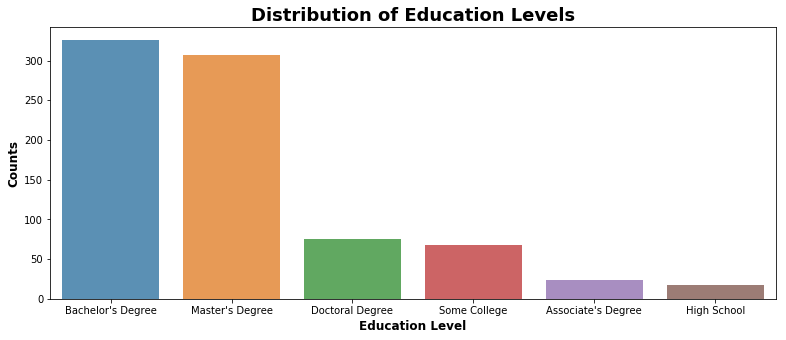

In [17]:
plt.figure(figsize=(13,5))
sns.barplot(education_counts.index, education_counts.values, alpha=0.8)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.title('Distribution of Education Levels',fontweight="bold", size=18)
plt.ylabel('Counts', fontsize = 12, fontweight="bold")
plt.xlabel('Education Level', fontsize = 12, fontweight="bold")
plt.show()

**From this graph, it may look like the reason Doctoral candidates are not getting hired is because of the sheer number of Bachelor/Master candidates. We were told that Doctoral candidates are preferred and that education is something that is highly regarded at Academics.**

<a name=2 />

## 2: Visualizing current status based on education level using a stacked bar chart.

In [18]:
crosstab = pd.crosstab(index=df['Education Level'], columns=df['Current Status'])
crosstab

Current Status,Candidate withdrawal,Declined Offer,Hired,Hired Elsewhere,Hired another candidate,Not Qualified,Not a Fit,Others more Qualified
Education Level,,,,,,,,
Associate's Degree,6,0,0,0,1,12,5,0
Bachelor's Degree,12,0,4,4,13,184,109,0
Doctoral Degree,1,1,0,0,0,25,48,0
High School,5,0,0,0,0,7,5,0
Master's Degree,10,0,1,2,8,136,149,1
Some College,13,1,1,0,0,35,18,0


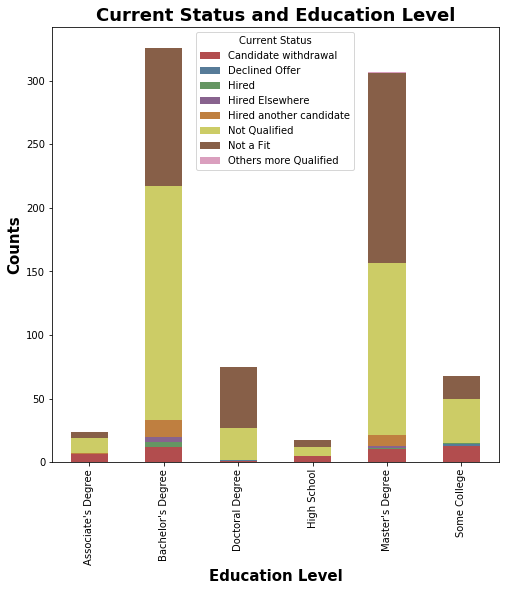

In [19]:
pal = sns.color_palette("Set1", n_colors=8, desat=.5)
crosstab.plot(kind="bar", figsize=(8,8), stacked=True,color=pal)
plt.yticks(fontsize=10)
plt.title('Current Status and Education Level',fontweight="bold", size=18)
plt.ylabel('Counts', fontsize = 15, fontweight="bold")
plt.xlabel('Education Level', fontsize = 15, fontweight="bold")
plt.show()

**Pretty much a distribution that you would expect from the current status of these education levels.  One thing to note though is how more than half of the doctoral candidates are categorized as 'not a fit'; something that is not true of other education levels.**

<a name=3 />

## 3: Why are doctoral candidates not getting hired, what does the data say about this?

**This was one of the specific questions that our stakeholder had of our dataset.  We attempted to analyze the data on these candidates to see why they were slipping through the cracks in the interview process.**

In [20]:
doctorate_df = df[df['Education Level'] == 'Doctoral Degree']
doctorate_df.head()

,Application Date,First Name,Last Name,Position,Current Status,Education Level,Desired Salary
173,2018-01-31,Ryan,McCormick,Research Analyst,Not Qualified,Doctoral Degree,40000
182,2017-09-13,Jenaya,Perdue,Research Analyst,Not a Fit,Doctoral Degree,40000
222,2017-09-30,Jenaya,Perdue,Instructional Designer,Not Qualified,Doctoral Degree,45000
232,2018-07-17,James,Zimmermann,Research Analyst,Not a Fit,Doctoral Degree,45000
291,2017-09-27,Petar,Markovski,Instructional Designer,Not Qualified,Doctoral Degree,50000


#### As we can see from this value counter, most of the doctoral candidates are applying to be research analysts.  What could this mean?

In [21]:
doctorate_df["Position"].value_counts()

Research Analyst           59
Instructional Designer     14
Associate Brand Manager     1
Journalist                  1
Name: Position, dtype: int64

**The majority of doctoral candidates are applying to be research analysts.**

#### Visualizing the distrubution of desired salary based on education level:

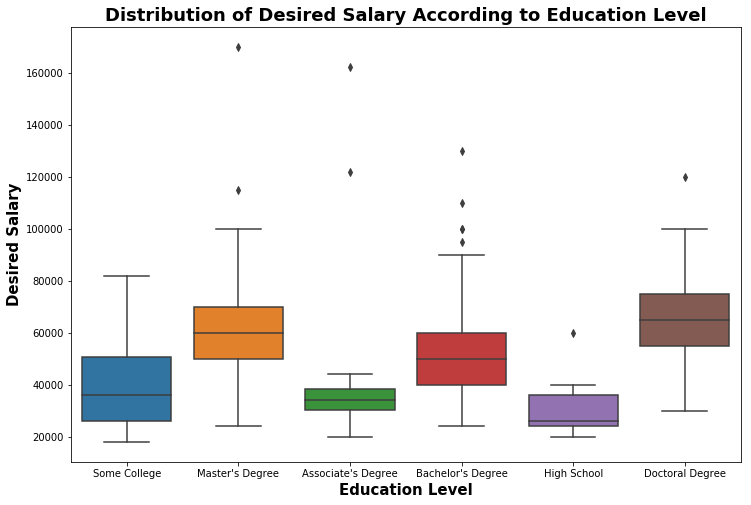

In [22]:
fig, ax = plt.subplots(figsize = (12,8))
chart = sns.boxplot(x='Education Level',y='Desired Salary', data=df, ax = ax)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.title('Distribution of Desired Salary According to Education Level',fontweight="bold", size=18)
plt.ylabel('Desired Salary', fontsize = 15, fontweight="bold")
plt.xlabel('Education Level', fontsize = 15, fontweight="bold")
plt.show()

**Looking at this boxplot above we can see that the doctoral candidates are desiring a higher average salary than other education levels.  This could be factoring in to why they are not getting hired.  If Academics feels like they can have someone for cheaper with the same ability to perform, why not do that?**

In [23]:
dcounts = doctorate_df['Current Status'].value_counts()

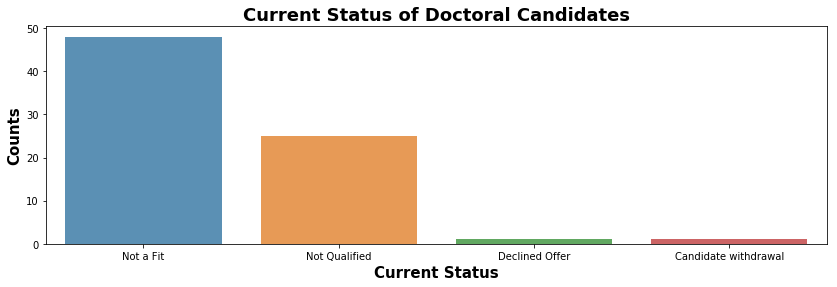

In [24]:
plt.figure(figsize=(14,4))
sns.barplot(dcounts.index, dcounts.values, alpha=0.8)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.title('Current Status of Doctoral Candidates',fontweight="bold", size=18)
plt.ylabel('Counts', fontsize = 15, fontweight="bold")
plt.xlabel('Current Status', fontsize = 15, fontweight="bold")
plt.show()

<a name=1 />

### 4 Findings of Doctoral Candidates:
* A lot less of them applying compared to other education levels.
* More than half categorized as 'Not a Fit.'
* They are desiring higher salaries.
* Applying to be mostly Research Analysts.

**These findings help us understand why a lot of these seemingly more qualified candidates are not getting hired.  In a pure numbers game, they are being overwelmed by Bachelor's and Master's candidates, even though they are considered top tier candidates.  They are mostly not fitting with the organization (which will hopefully make more sense to the HR Manager).  Their high desired salary range makes it tough to hire them over an equally qualified candidate.  And finally, they are mostly applying to be Research Analysts; not sure what to do with that information but combined with the other findings it could be an important trend for our stakeholder.** 

## 4: What is the most popular position according to applicant numbers, and which one has the highest desired salary?

In [25]:
df['Position'].unique()

array(['Office Assistant', 'Operations Assistant & Receptionist',
       'Research Analyst', 'Executive Assistant', 'Journalist',
       'Program Manager', 'Data Entry / Order Fulfillment', 'IT Intern',
       'Instructional Designer', 'Associate Brand Manager',
       'Membership Sales Executive', 'Sales Consultant'], dtype=object)

In [26]:
df['Position'].value_counts()

Research Analyst                       428
Program Manager                        161
Instructional Designer                 153
Journalist                              97
Executive Assistant                     78
Data Entry / Order Fulfillment          58
Operations Assistant & Receptionist     52
Office Assistant                        51
Associate Brand Manager                 34
Membership Sales Executive              17
Sales Consultant                        15
IT Intern                                2
Name: Position, dtype: int64

**The dataset we were given is overwhelmingly research analyst applications.  This bias in the data will skew our results slightly when doing further inferential and descriptive analysis, and our stakeholder must keep that in mind.  But it's also is an interesting piece of information that our stakeholder might not have been aware of, why are so many candidates applying for this position?** 

#### Here we have a dataframe that outlines the average desired salary (high to low) based on position.

In [27]:
position_salary_df = pd.DataFrame(df.groupby(['Position'])['Desired Salary'].agg(lambda x: x.unique().mean()))
position_salary_df = position_salary_df.reset_index()
position_salary_df = position_salary_df.sort_values(by=['Desired Salary'], ascending=False)

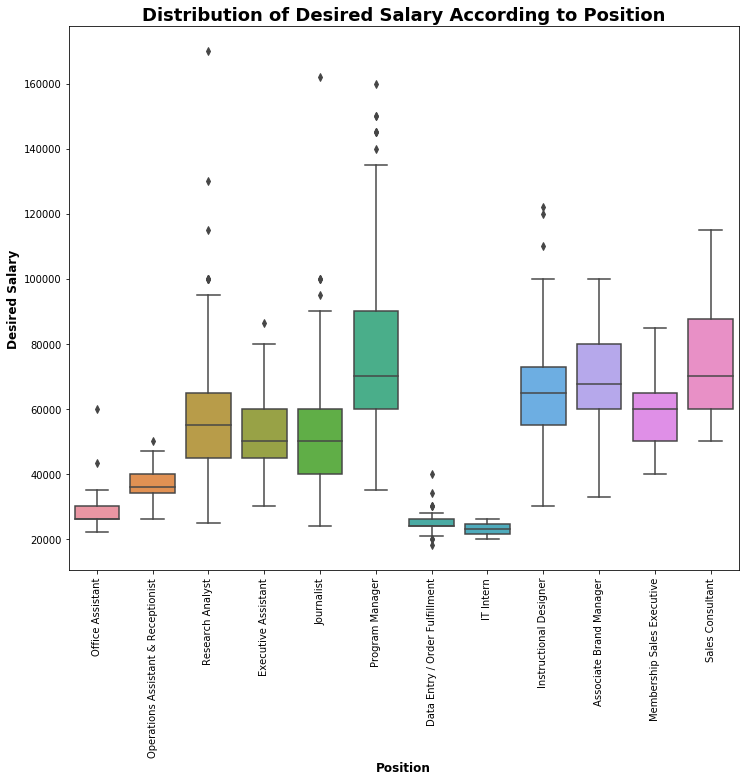

In [28]:
fig, ax = plt.subplots(figsize = (12,10))
chart = sns.boxplot(x='Position',y='Desired Salary', data=df, ax = ax)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.title('Distribution of Desired Salary According to Position',fontweight="bold", size=18)
plt.ylabel('Desired Salary', fontsize = 12, fontweight="bold")
plt.xlabel('Position', fontsize = 12, fontweight="bold")
plt.xticks(rotation = 90)
plt.show()

**From this boxplot we can see that the top three positions in terms of desired salary are: Sales Consultant, Program Manager, and Associate Brand Manager.  Are these positions' desired salary ranges reflective of their responsibilities and workload in the company?**

# Implementation of Second and Third Datasets (Sections 5 and 6) 

* To compare the data we have from Academics with outside information, we will introduce a second dataset from Glassdoor.com concerning positions and their respective salaries.
* Upon acquiring the dataset from Glassdoor, Academics provided six salaries of positions in their company that were in the Glassdoor dataset.  We fused this information with the data from Academics to create a third dataset.

### Dataset 3

In [29]:
df3 = pd.read_csv('data2.csv')
df3

,Job_Title,City,Salary
0,Business Development Manager,AI (Denver),80000
1,Software Engineer,AI (Denver),101000
2,Program Manager,AI (Denver),65000
3,Technical Editor,AI (Denver),63000
4,Human Resources Manager,AI (Denver),93500
5,Operations Manager,AI (Denver),75000


### Cleaning Dataset 2

In [30]:
df2 = pd.read_csv('national.csv',dtype={'Value': float})
print('Length: ' + str(len(df2)))
df2.head()

Length: 1936


,Metro,Dimension Type,Month,Dimension,Measure,Value,YoY
0,National,Job Title,2018-10,Software Engineer,Median Base Pay,87874.0,3.10%
1,National,Job Title,2018-10,Programmer Analyst,Median Base Pay,69916.0,4.80%
2,National,Job Title,2018-10,Consultant,Median Base Pay,72861.0,0.20%
3,National,Job Title,2018-10,Project Manager,Median Base Pay,70213.0,-4.10%
4,National,Job Title,2018-10,Store Manager,Median Base Pay,49905.0,2.50%


#### Dropping unneeded columns

In [31]:
df2 = df2.drop(['YoY','Measure', 'Dimension Type', 'Month'],axis=1)

#### Renaming some values to make it easier to compare to the original dataset from Academics.

In [32]:
df2.columns = ['City','Job_Title','Salary']

#### Removing unneeded values in our dataset.

In [33]:
df2 = df2[df2.Job_Title != 'Median Base Pay']
df2 = df2[df2.Job_Title != 'Metro Median Base Pay']
df2 = df2[df2.City != 'Timeseries']
df2 = df2[df2.City != 'National']

In [34]:
df2 = df2[df2['Job_Title'].isin(['Technical Editor','Software Engineer','Business Development Manager','Software Engineer', 'Program Manager', 'Human Resources Manager', 'Operations Manager',])]

#### Cleaned Glassdoor data set

In [35]:
print('Length: ' + str(len(df2)))
df2 = df2.append(df3,sort=False,ignore_index=True)
df2.head()

Length: 60


,City,Job_Title,Salary
0,Atlanta,Software Engineer,86019.0
1,Atlanta,Operations Manager,72625.0
2,Atlanta,Business Development Manager,76632.0
3,Atlanta,Human Resources Manager,78024.0
4,Atlanta,Technical Editor,54888.0


#### These are the 11 cities represented in our new dataset

In [36]:
df2['City'].unique()

array(['Atlanta', 'New York City', 'Los Angeles', 'Philadelphia',
       'Houston', 'Seattle', 'San Francisco', 'Chicago', 'Boston',
       'Washington DC', 'AI (Denver)'], dtype=object)

**At this point we felt that creating a national dataframe with salary information from other cities around the US might show that Academics is paying below market value for the positions they frequently hire for.**
<br>

**We found the November 2018 dataset from Glassdoor.com which gave us job data that included multiple cities, titles as well as the average salary for each position.  We pulled a handful of position titles from our Glassdoor dataset and asked Academics if they had hired for any of these same positions in the past.  We were able to match six positions between Glassdoor and Academics and were given the starting hiring salary of those positions, which is why would had to anonymize the name or our stakeholder.**

<a name=5 />

## 5: What are the national salary averages of job titles that Academics currently employs? 

In [37]:
df2_s_j = pd.DataFrame(df2.groupby(['Job_Title'])['Salary'].agg(lambda x: x.unique().mean()))
df2_s_j = df2_s_j.reset_index()
df2_s_j

,Job_Title,Salary
0,Business Development Manager,83057.272727
1,Human Resources Manager,87320.727273
2,Operations Manager,77521.000000
3,Program Manager,86163.454545
4,Software Engineer,98856.636364
5,Technical Editor,62864.000000


<a name=6 />

## 6: Is Academics paying above or below average compared to other cities represented in our new dataset?

In [38]:
df2_analysis = pd.DataFrame(df2.groupby(['Job_Title', 'City'])['Salary'].agg(lambda x: x.unique().mean()))
df2_analysis = df2_analysis.reset_index()
df2_analysis = df2_analysis.sort_values(by=['City'])

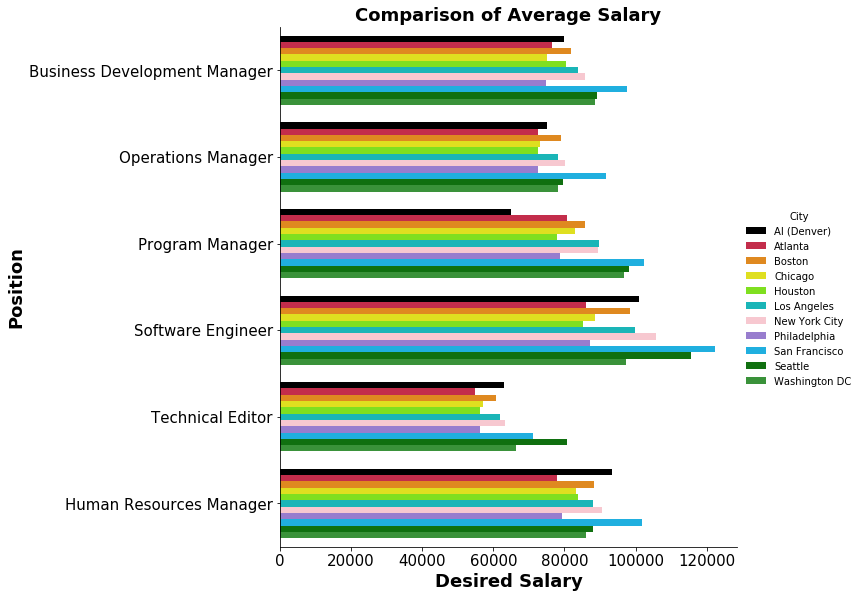

In [39]:
palette ={"AI (Denver)":"black","Atlanta":"crimson","Boston":"darkorange", "Chicago":"yellow",
         "Houston":"chartreuse","Los Angeles":"darkturquoise","New York City":"pink", "Philadelphia":"mediumpurple",
         "San Francisco":"deepskyblue","Seattle":"g","Washington DC":"C2"}

sns.catplot(x="Salary", y="Job_Title", hue="City", data=df2_analysis, kind="bar",
           height=8, aspect=1.2, palette=palette)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title('Comparison of Average Salary',fontweight="bold", size=18)
plt.ylabel('Position', fontsize = 18, fontweight="bold")
plt.xlabel('Desired Salary', fontsize = 18, fontweight="bold")
plt.show()

<a name=7/>

<a name=7 />

## 7: When are there spikes in applications?

In [40]:
df['Month'] = df['Application Date'].dt.month

In [41]:
month_counts = df['Month'].value_counts()

In [42]:
mcounts_df = pd.DataFrame(month_counts)

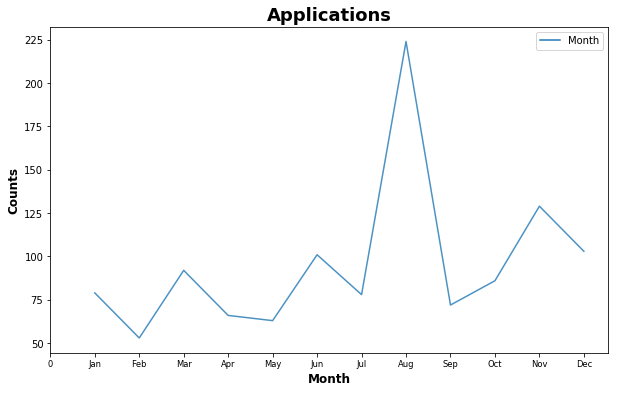

In [43]:
plt.figure(figsize=(10,6))
m = ['0','Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
sns.lineplot(data = mcounts_df, alpha=0.8)
#set_xticklabels(m, rotation='vertical', fontsize=18)
plt.xticks(range(len(mcounts_df)+1), m, size='small')
plt.yticks(fontsize=10)
plt.title('Applications',fontweight="bold", size=18)
plt.ylabel('Counts', fontsize = 12, fontweight="bold")
plt.xlabel('Month', fontsize = 12, fontweight="bold")
plt.show();

#### As we can see from the graph above, there is a major spike in applications in the month of August.  Not exactly sure what is causing this?  This is useful for an HR manager to know as they can better prepare for a greater influx in applications.

<a name=8 />

## 8: What sort of candidates are getting hired?

In [44]:
hired_df = df[df['Current Status'] == 'Hired']
hired_df

,Application Date,First Name,Last Name,Position,Current Status,Education Level,Desired Salary,Month
61,2017-12-13,Kristen,Blyleven,Data Entry / Order Fulfillment,Hired,NaN,24000,12
72,2017-08-17,Mylas,Stokes,Data Entry / Order Fulfillment,Hired,Bachelor's Degree,24000,8
92,2017-07-31,Dora,Grace,Data Entry / Order Fulfillment,Hired,Bachelor's Degree,24000,7
103,2018-02-01,Vincent,McGargill,IT Intern,Hired,NaN,26000,2
528,2017-09-29,Sasha,Egorova,Research Analyst,Hired,Master's Degree,60000,9
572,2018-05-06,Courtney,Biedermann,Journalist,Hired,Bachelor's Degree,65000,5
576,2018-03-21,Whitney,Egstad,Program Manager,Hired,NaN,65000,3
584,2017-10-18,Barry,Wilhelm,Program Manager,Hired,NaN,65000,10
617,2018-06-11,Timea,Halmai,Associate Brand Manager,Hired,Bachelor's Degree,70000,6
727,2018-03-13,Ashley,Brand,Program Manager,Hired,NaN,80000,3


In [45]:
hired_df['Position'].value_counts()

Program Manager                        5
Data Entry / Order Fulfillment         3
Research Analyst                       1
Journalist                             1
Operations Assistant & Receptionist    1
Associate Brand Manager                1
IT Intern                              1
Name: Position, dtype: int64

In [46]:
hired_salary_df = pd.DataFrame(hired_df.groupby(['Position'])['Desired Salary'].agg(lambda x: x.unique().mean()))
hired_salary_df = hired_salary_df.reset_index()
hired_salary_df = hired_salary_df.sort_values(by=['Desired Salary'])

In [47]:
merged = pd.merge(position_salary_df, hired_salary_df, on=['Position'],how='outer')
merged.columns = ['Position', 'All Applicants', 'Hired Applicants']
merged

,Position,All Applicants,Hired Applicants
0,Sales Consultant,82400.000000,NaN
1,Program Manager,81512.820513,77500.0
2,Associate Brand Manager,70866.666667,70000.0
3,Instructional Designer,69242.393939,NaN
4,Research Analyst,60819.169811,60000.0
5,Membership Sales Executive,60555.555556,NaN
6,Journalist,60020.833333,65000.0
7,Executive Assistant,54120.000000,NaN
8,Operations Assistant & Receptionist,38333.333333,40000.0
9,Office Assistant,31493.538462,NaN


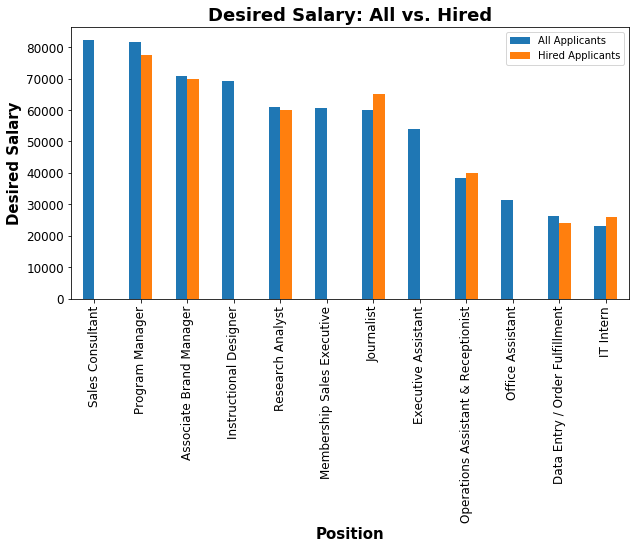

In [48]:
merged.plot(kind='bar', figsize=(10, 5), legend=True, fontsize=12)
plt.xticks(np.arange(len(merged['Position'])), merged['Position'], rotation = 90)
plt.title('Desired Salary: All vs. Hired',fontweight="bold", size=18)
plt.ylabel('Desired Salary', fontsize = 15, fontweight="bold")
plt.xlabel('Position', fontsize = 15, fontweight="bold")
plt.show()

**Originally we thought it would be beneficial to look at just the attributes of the candidates that have gotten hired.  We found that of all the applicants in this dataset only 12 of them were hired.  There were no significant defining features of these twelve to justify why they might have gotten hired.**

<a name=9 />

## 9: Attempting to predict position based on education level and desired salary.

### Logistic Regression

#### Training the Model:

In [49]:
df.columns = [c.replace(' ', '_') for c in df.columns]
df = df.dropna(subset=['Education_Level'])

#### Choosing Education Level and Desired Salary as our features to predict the label of Position.

In [50]:
features = df[['Education_Level','Desired_Salary']]
labels = df.Position

#### Splitting our data into training and testing sets.

In [51]:
X_train, X_test, Y_train, Y_test = train_test_split(features, labels, random_state=1)
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(612, 2) (205, 2) (612,) (205,)


#### Vectorizing our Education Level column along with stacking our two features into one combined variable.

In [52]:
v = CountVectorizer()
X_train_el = v.fit_transform(X_train.Education_Level.values.astype('str'))
train_salary = X_train.Desired_Salary.values[:,None]
X_train_cb = hstack((X_train_el, train_salary))

In [53]:
X_test_el = v.fit_transform(X_test.Education_Level.values.astype('str'))
test_salary = X_test.Desired_Salary.values[:,None]
X_test_cb = hstack((X_test_el, test_salary))

#### Fitting the model:

In [54]:
lgr = linear_model.LogisticRegression()
lgr.fit(X_train_cb,Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

#### Accuracy:

In [55]:
print("Training accuracy: %0.6f" % accuracy_score(Y_train, lgr.predict(X_train_cb)))
print("Testing accuracy: %0.6f" % accuracy_score(Y_test, lgr.predict(X_test_cb)))

Training accuracy: 0.527778
Testing accuracy: 0.507317


**This logistic regression could be interesting to our stakeholder.  Our initial model is not fine tuned to fit the data well enough yet, but if fixed up sufficiently it could be very interesting to have high accuracy in predicting position based on desired salary and education level.** 

## Conclusion:

Ultimately we feel that we could not answer Academics original question of "why Doctoral candidates were not getting hire or dropping out of the interview process.  We feel this is due in large part to not having access to WHY a candidate was not a fit.  However, we were able to provide Academics with other information we feel will be important to the HR Manager such as the large spike of applicants during the month of August and how their pay stacks up against other cities around the US.

## Bias:

In terms of bias, the research analyst position was our main culprit.  This position overwhelms our dataset and skews our data as a result.  It is also very broad and encompasses a variety of skill sets. An analyst role like this one is going to differ greatly from company to company. It would be doable, but difficult, to make an apples to apples comparison across industries, which might affect salary and give us more insight to answer the original questions from our Stakeholder.

## Next Steps for Academics:

We feel that if they truly want to have more insight into their hiring analytics, they are going to have to have a much more powerful applicant tracking system in place that is able to figure out a lot of these types of analytics for them or they are going to have to do some of this analysis in-house where confidential information can be more easily shared.  It would have also helped us to have a wider range of applications, which the company surely has.  We are hoping they can build off of what we have found out through our given resources and expound upon it.